In [1]:
import matplotlib.pyplot as plt
import numpy as np

We are solving 



https://en.wikipedia.org/wiki/Cubic_equation

In [10]:

def pq(omega_sq, zeta):
    b = 2 * zeta
    d = 1./omega_sq
    p = 1. - np.square(b)/3.
    q = d + (2 * np.square(b) - 9.) * b /27.
    return p, q

def delt(p, q):
    return np.square(q)/4. + (p**3)/27.

def upm(p, q):
    sqrtD = np.sqrt(delt(p, q))
    u1, u2 = -0.5 * q + sqrtD, -0.5 * q - sqrtD
    return np.cbrt(u1), np.cbrt(u2)

def beta12(omega_sq, zeta):
    b = 2 * zeta
    p, q = pq(omega_sq, zeta)
    up, um = upm(p, q)
    usum = up + um
    beta1 = - usum + b / 3.
    beta2 = 0.5 * usum + b / 3.
    omega = (up - um) * 0.5 * np.sqrt(3.) 
    return beta1, beta2, omega

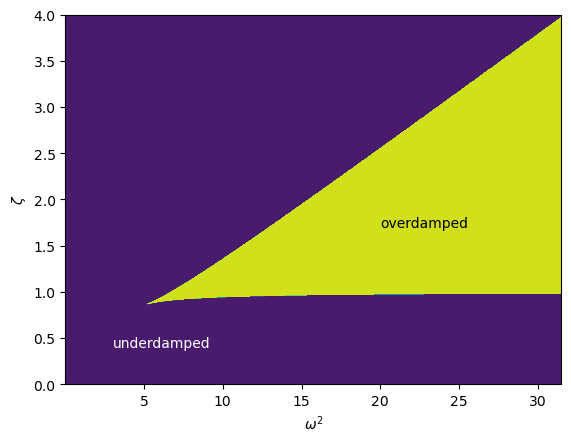

In [17]:

x = np.linspace(0.01, 31.5, 1000)
y = np.linspace(0, 4, 1000)

X, Y = np.meshgrid(x, y)

#underdamped = 4*Y*(9 - 8*np.square(Y))/X + 4*(np.square(Y) - 1) - 27/np.square(X) < 0
P, Q = pq(X, Y)
underdamped = delt(P, Q) > 0.
Z = np.ones(np.shape(X))
Z[underdamped] *= 0

plt.contourf(X, Y, Z)
plt.ylabel(r'$\zeta$')
plt.xlabel(r'$\omega^2$')
plt.text(20, 1.7, 'overdamped')
plt.text(3, 0.4, 'underdamped', color = 'white')
plt.savefig('phases.png')
plt.show()

/tmp/ipykernel_19434/1192507843.py:12: RuntimeWarning: invalid value encountered in sqrt
  sqrtD = np.sqrt(delt(p, q))


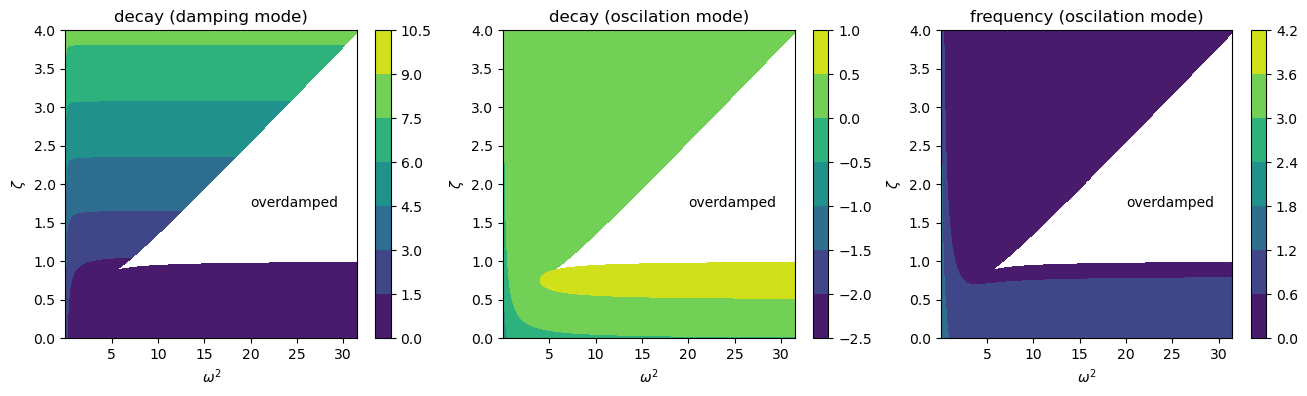

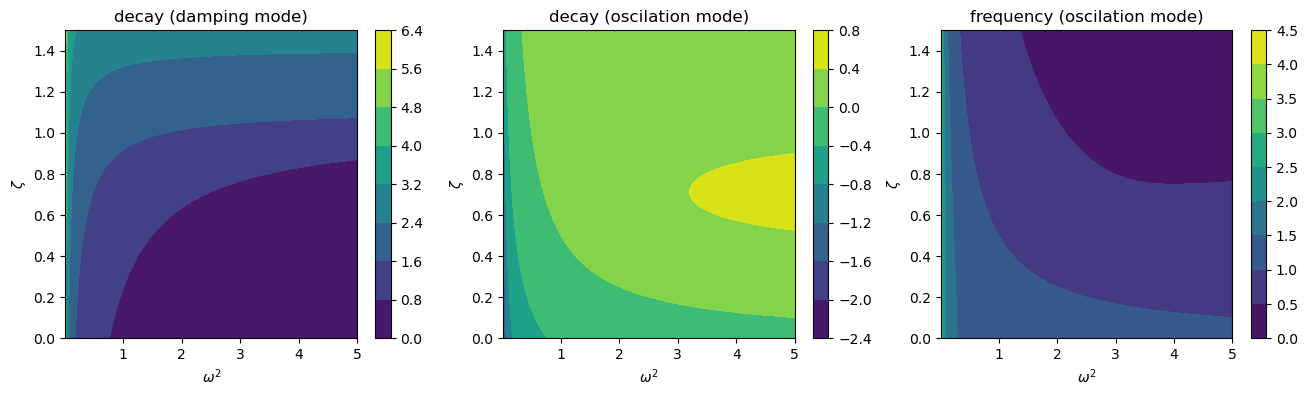

In [20]:
def phase_portrait(zoomin):
    if not zoomin:
        x = np.linspace(0.01, 31.5, 5000)
        y = np.linspace(0, 4, 5000)
    else:
        x = np.linspace(0.01, 5, 5000)
        y = np.linspace(0, 1.5, 5000)

    X, Y = np.meshgrid(x, y)

    res = beta12(X, Y)
    title= ['decay (damping mode)', 'decay (oscilation mode)', 'frequency (oscilation mode)']

    plt.figure(figsize = (16, 4))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        plt.contourf(X, Y, res[i])
        plt.ylabel(r'$\zeta$')
        plt.xlabel(r'$\omega^2$')
        if not zoomin:
            plt.text(20, 1.7, 'overdamped')
        plt.colorbar()

    plt.savefig('phase_portrait'+('_zoomin' if zoomin else '')+'.png')
    plt.show()
    
phase_portrait(False)
phase_portrait(True)

/tmp/ipykernel_19434/1192507843.py:12: RuntimeWarning: invalid value encountered in sqrt
  sqrtD = np.sqrt(delt(p, q))


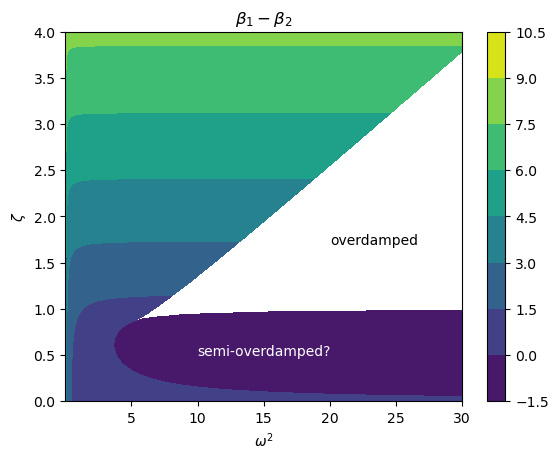

In [22]:

x = np.linspace(0.01, 30, 1000)
y = np.linspace(0, 4, 1000)

X, Y = np.meshgrid(x, y)

beta1, beta2, _ = beta12(X, Y)
plt.title(r'$\beta_1 - \beta_2$')
Z = beta1 - beta2
plt.contourf(X, Y, Z)
plt.ylabel(r'$\zeta$')
plt.xlabel(r'$\omega^2$')
plt.text(20, 1.7, 'overdamped')
plt.text(10, 0.5, 'semi-overdamped?', color = 'white')
plt.colorbar()
plt.savefig('damping_difference.png')
plt.show()